In [ ]:
"""
Author: Jose P. Teran
Date: 2026-02-11

Description:
Get irrigated amount for a respective reservoir
"""

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import read_swat
from shapely.geometry import box
os.chdir('/media/jopato/jopato_ssd/PHD/PHD_main/Projects/CoSWAT/Paper_Ch2/codeAndDataAvailability/teran_et_al_2026_coswat_reservoirs')#'/data/brussel/vo/000/bvo00033') # All relative paths will be based on this ! !
analysis_folder = 'Scripts/result_analysis' #f'vsc10883/PHD_main/Projects/CoSWAT/Scripts/result_analysis'

In [ ]:
region = 'africa-nile'

path_to_swat_file_wb   = "CoSWAT-Framework/model-setup/CoSWATv1.5.0/africa-nile/Scenarios/Default/TxtInOut/hru_wb_aa.txt"
path_to_swat_file_pw   = "CoSWAT-Framework/model-setup/CoSWATv1.5.0/africa-nile/Scenarios/Default/TxtInOut/hru_pw_aa.txt"
path_to_shapefile      = "CoSWAT-Framework/model-setup/CoSWATv1.5.0/africa-nile/Watershed/Shapes/hrus2.shp"
nasser_irrigation_file = "vsc10883/PHD_main/Projects/CoSWAT/Scripts/result_analysis/reservoirs_coswat/others/nasser_irrigated_hrus.gpkg"

In [3]:
nile_gdf = gpd.read_file(nasser_irrigation_file)

<Axes: >

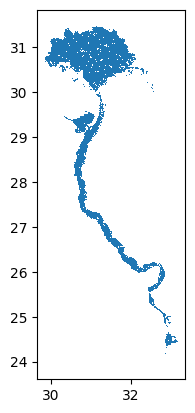

In [ ]:
bbox = box(20,22,40,40)
nasser_gdf = nile_gdf.clip(bbox)
nasser_gdf.plot()

In [ ]:
df_wb = read_swat.swat_table(path_to_swat_file_wb)
df_pw = read_swat.swat_table(path_to_swat_file_pw)

gdf_wb = read_swat.swat_map(path_to_shapefile,df_wb).gdframe
gdf_pw = read_swat.swat_map(path_to_shapefile,df_pw).gdframe
hru_list = nasser_gdf['HRUS'].to_list()
hru_list = list(map(int, hru_list))
nasser_swat_gdf = gdf_wb[gdf_wb['irr']>0]
nasser_swat_gdf_pw = gdf_pw[gdf_pw['unit'].isin(hru_list)]
nasser_swat_gdf = nasser_swat_gdf.to_crs('epsg:3857')
nasser_swat_gdf['area'] = nasser_swat_gdf.geometry.area
irr_gdf = nasser_swat_gdf[['irr','area']]
irr_gdf['irr_m3'] = irr_gdf['irr']/1000*irr_gdf['area']

print(irr_gdf['irr_m3'].sum()/1e9)